In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/output.csv')

In [32]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        print("GPU:", gpu)
else:
    print("No GPU available, using CPU.")


GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [33]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted']])
encoded_labels = pd.get_dummies(data['mtd'])

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data[['mtd_freq', 'compromised_num']]], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [34]:
# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # Output layer: 4 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.fit(X_train, y_train,epochs=10)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2259 - loss: 10.3742
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2785 - loss: 3.4304
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3056 - loss: 2.4750
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3316 - loss: 1.7999
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3014 - loss: 1.5695
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3226 - loss: 1.5458
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4475 - loss: 1.3164
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4055 - loss: 1.4027
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3865 - loss: 1.5671
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4503 - loss: 1.4286


In [36]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3371 - loss: 1.3675 


[1.4088795185089111, 0.3181818127632141]

With metrics as target values

In [123]:
# Assuming your CSV data is saved as 'data.csv'
data = pd.read_csv('data_processing/metrics/simulation_metrics.csv')

In [124]:
import tensorflow as tf

# Assuming X_train and y_train are your training data and labels
# X_train.shape[1] is the number of features in your input data

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])  # You can add additional metrics like Mean Absolute Error (MAE)


/Users/williamho/Downloads/kaggle_keras/.conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:
# Preprocessing
# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['curr_attack', 'interrupted', 'mtd']])
targets = data['roa']

# Combine one-hot encoded features with other numerical features
features = pd.concat([pd.DataFrame(encoded_features), data[['mtd_freq', 'compromised_num','total had os dependency', 'impact', 'complexity']]], axis=1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

In [126]:
X_train, y_train

(       0    1    2    3    4    5    6    7    8    9  mtd_freq  \
 22   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.005461   
 15   0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.000000   
 65   0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.005692   
 11   0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.005199   
 42   0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.005180   
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
 71   0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.005257   
 106  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.014274   
 14   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.005135   
 92   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.007114   
 102  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.005272   
 
      compromised_num  total had os dependency    impact  complexity  
 22                 3                     16.0  4.265071    0.684361  
 15                 0                   

In [127]:
model.fit(X_train, y_train,epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 12.4263 - mae: 2.7885
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.2629 - mae: 1.0481
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.6061 - mae: 1.1228
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.9871 - mae: 0.7141
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3445 - mae: 0.8729
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1.2514 - mae: 0.8016
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.8258 - mae: 0.6657
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9954 - mae: 0.7250
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6518 - mae: 0.5692
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7256 - mae: 0.5822
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6843 - mae: 0.5977
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5900 - mae: 0.5594
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

In [128]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.3310 - mae: 0.4635
Test loss: 0.3310140371322632, Test accuracy: 0.46348482370376587


In [129]:
y_pred = model.predict(X_test)# Plot predicted vs actual values
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[ 4.267979  ],
       [-0.01958382],
       [ 4.512671  ],
       [ 1.3755375 ],
       [-0.0195218 ],
       [-0.01335047],
       [ 1.535419  ],
       [ 3.4150965 ],
       [ 2.449303  ],
       [ 2.5750258 ],
       [ 3.6450799 ],
       [ 5.73247   ],
       [ 1.5633662 ],
       [ 4.8424344 ],
       [ 0.8578811 ],
       [ 4.5273466 ],
       [ 4.8646417 ],
       [ 4.2484536 ],
       [ 4.1768236 ],
       [ 4.263241  ],
       [ 1.9521981 ],
       [ 2.640236  ],
       [ 2.0363753 ],
       [ 4.526328  ],
       [ 4.1242023 ],
       [ 4.2618775 ],
       [ 3.1485078 ],
       [ 3.496195  ],
       [-0.01580657],
       [-0.02564719]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
(30, 1) (30,)


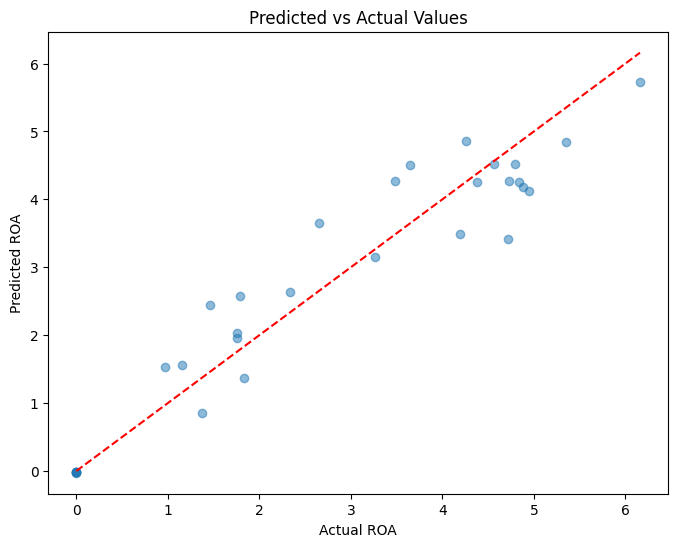

In [130]:
import matplotlib.pyplot as plt
# Make predictions on the testing data
y_pred = model.predict(X_test)# Plot predicted vs actual values
print(y_pred.shape, y_test.shape)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Plot the diagonal line
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual ROA')
plt.ylabel('Predicted ROA')
plt.show()